# Dodgers

## Marketing promotion to increase attendance

# Graphics Analysis and Regression Model

### Gloria Prada Moore


In [13]:
import pandas as pd
import yellowbrick
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("dodgers.csv")

In [5]:
data.head()

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO


In [7]:
data.shape

(81, 12)

In [8]:
data.dtypes

month          object
day             int64
attend          int64
day_of_week    object
opponent       object
temp            int64
skies          object
day_night      object
cap            object
shirt          object
fireworks      object
bobblehead     object
dtype: object

I want to have an idea how the statistics of the variables look like. For this I will describe them including the categorical variables

In [9]:
data.describe()

,day,attend,temp
count,81.000000,81.000000,81.000000
mean,16.135802,41040.074074,73.148148
std,9.605666,8297.539460,8.317318
min,1.000000,24312.000000,54.000000
25%,8.000000,34493.000000,67.000000
50%,15.000000,40284.000000,73.000000
75%,25.000000,46588.000000,79.000000
max,31.000000,56000.000000,95.000000


In [10]:
data.describe(include=['O'])

,month,day_of_week,opponent,skies,day_night,cap,shirt,fireworks,bobblehead
count,81,81,81,81,81,81,81,81,81
unique,7,7,17,2,2,2,2,2,2
top,MAY,Tuesday,Snakes,Clear,Night,NO,NO,NO,NO
freq,18,13,9,62,66,79,78,67,70


From the description above, most of the games happens in may, and Sneaks (I am not sure what team is this one, I'm pretty big fan of baseball :)) is the most seen opponent in the data set. Night games are also one of the most attended ones

Checking Missing Values

In [11]:
data.isnull().sum()

month          0
day            0
attend         0
day_of_week    0
opponent       0
temp           0
skies          0
day_night      0
cap            0
shirt          0
fireworks      0
bobblehead     0
dtype: int64

### Histograms

I am going to plot Histograms for the features that I consider important to plot, however, I would use other plots later to analyize better possible correlation, and outliers

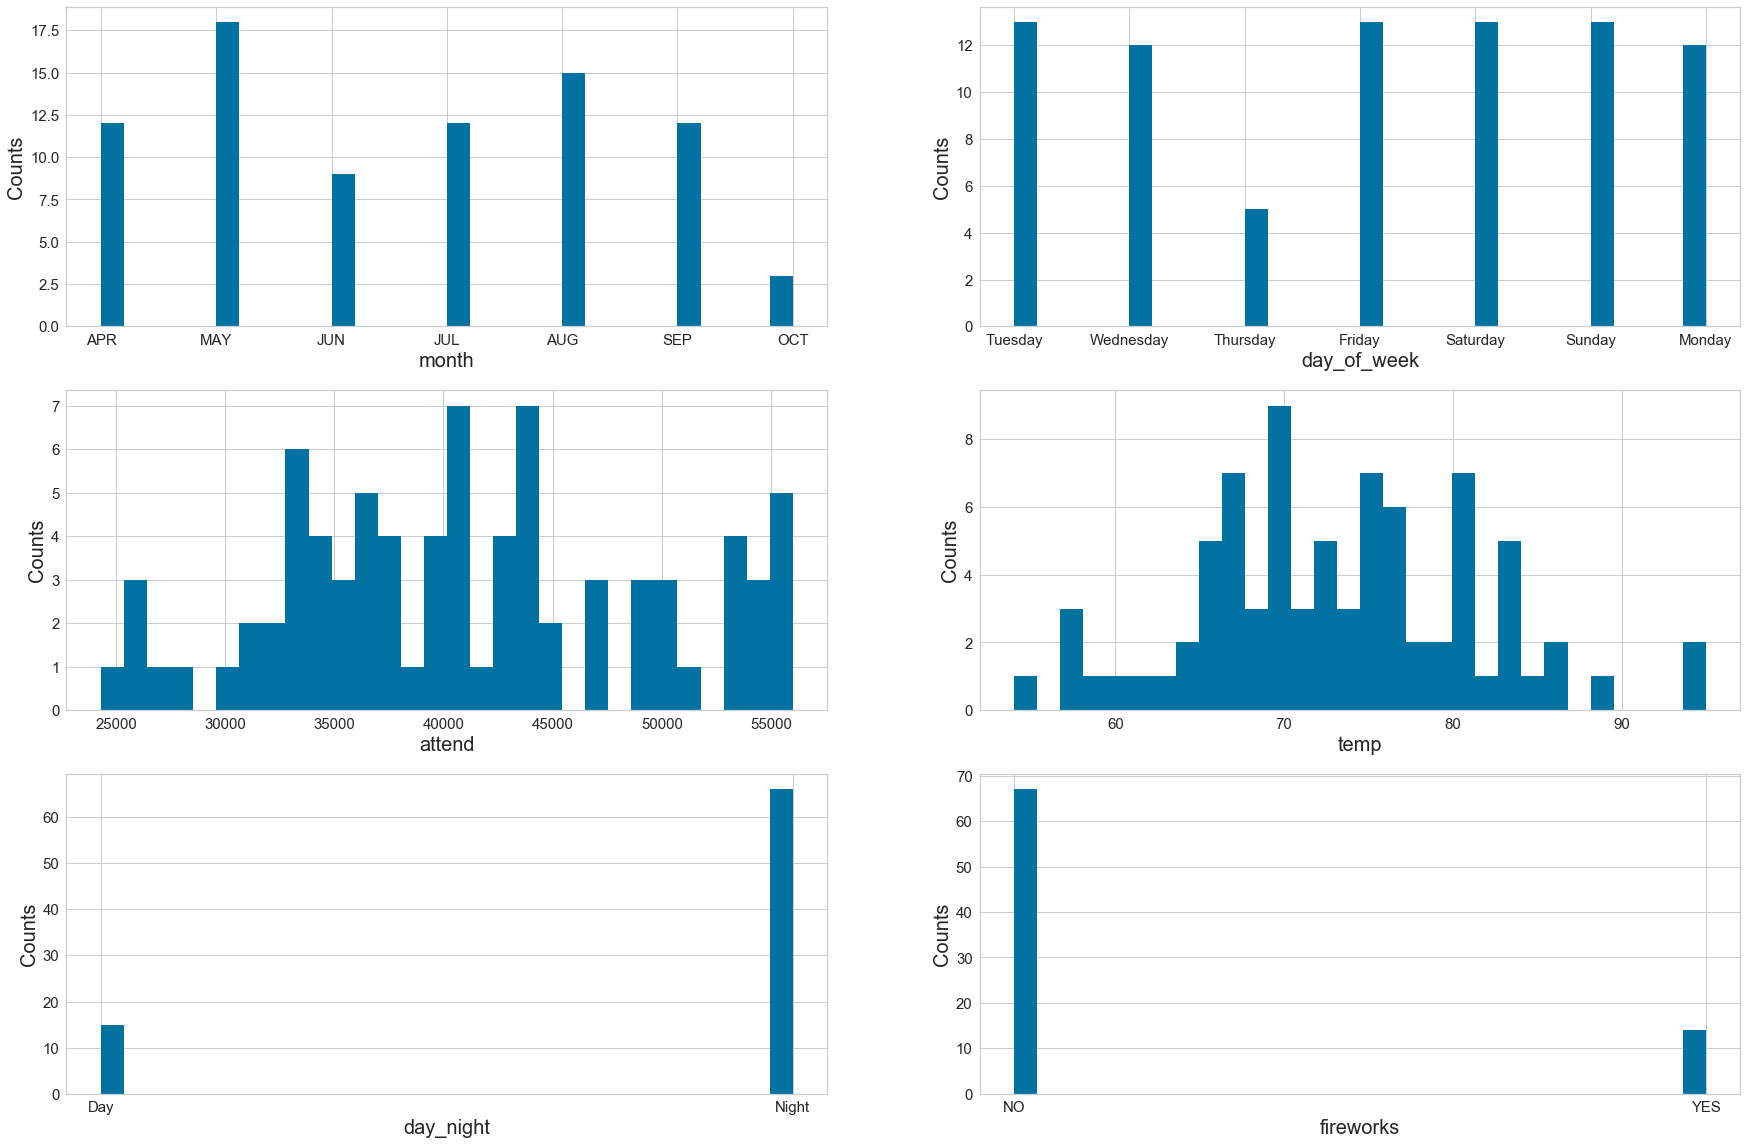

In [14]:
plt.rcParams['figure.figsize'] = (30, 20)
fig, axes = plt.subplots(nrows = 3, ncols = 2)


num_features = ['month', 'day_of_week', 'attend', 'temp', 'day_night', 'fireworks']
xaxes = num_features
yaxes = ['Counts', 'Counts', 'Counts', 'Counts', 'Counts', 'Counts']

axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(data[num_features[idx]], bins=30)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)

plt.show()

From the histograms avobe we can see most of the games happening in May, the mean of attendance in between 40k and 45k, having some other games that had pretty good attendance (>55k).

By the temperature histogram we can see that most of the games occur when temperatures are between 70 and 80 degrees, in my opnion this number is related with the month with more games, May

Most of the games happened at night and usually they do not have fireworks

## BoxPlot



For this part of this report I supported my codes on: https://seaborn.pydata.org/tutorial/categorical.html

IndexError: list index out of range

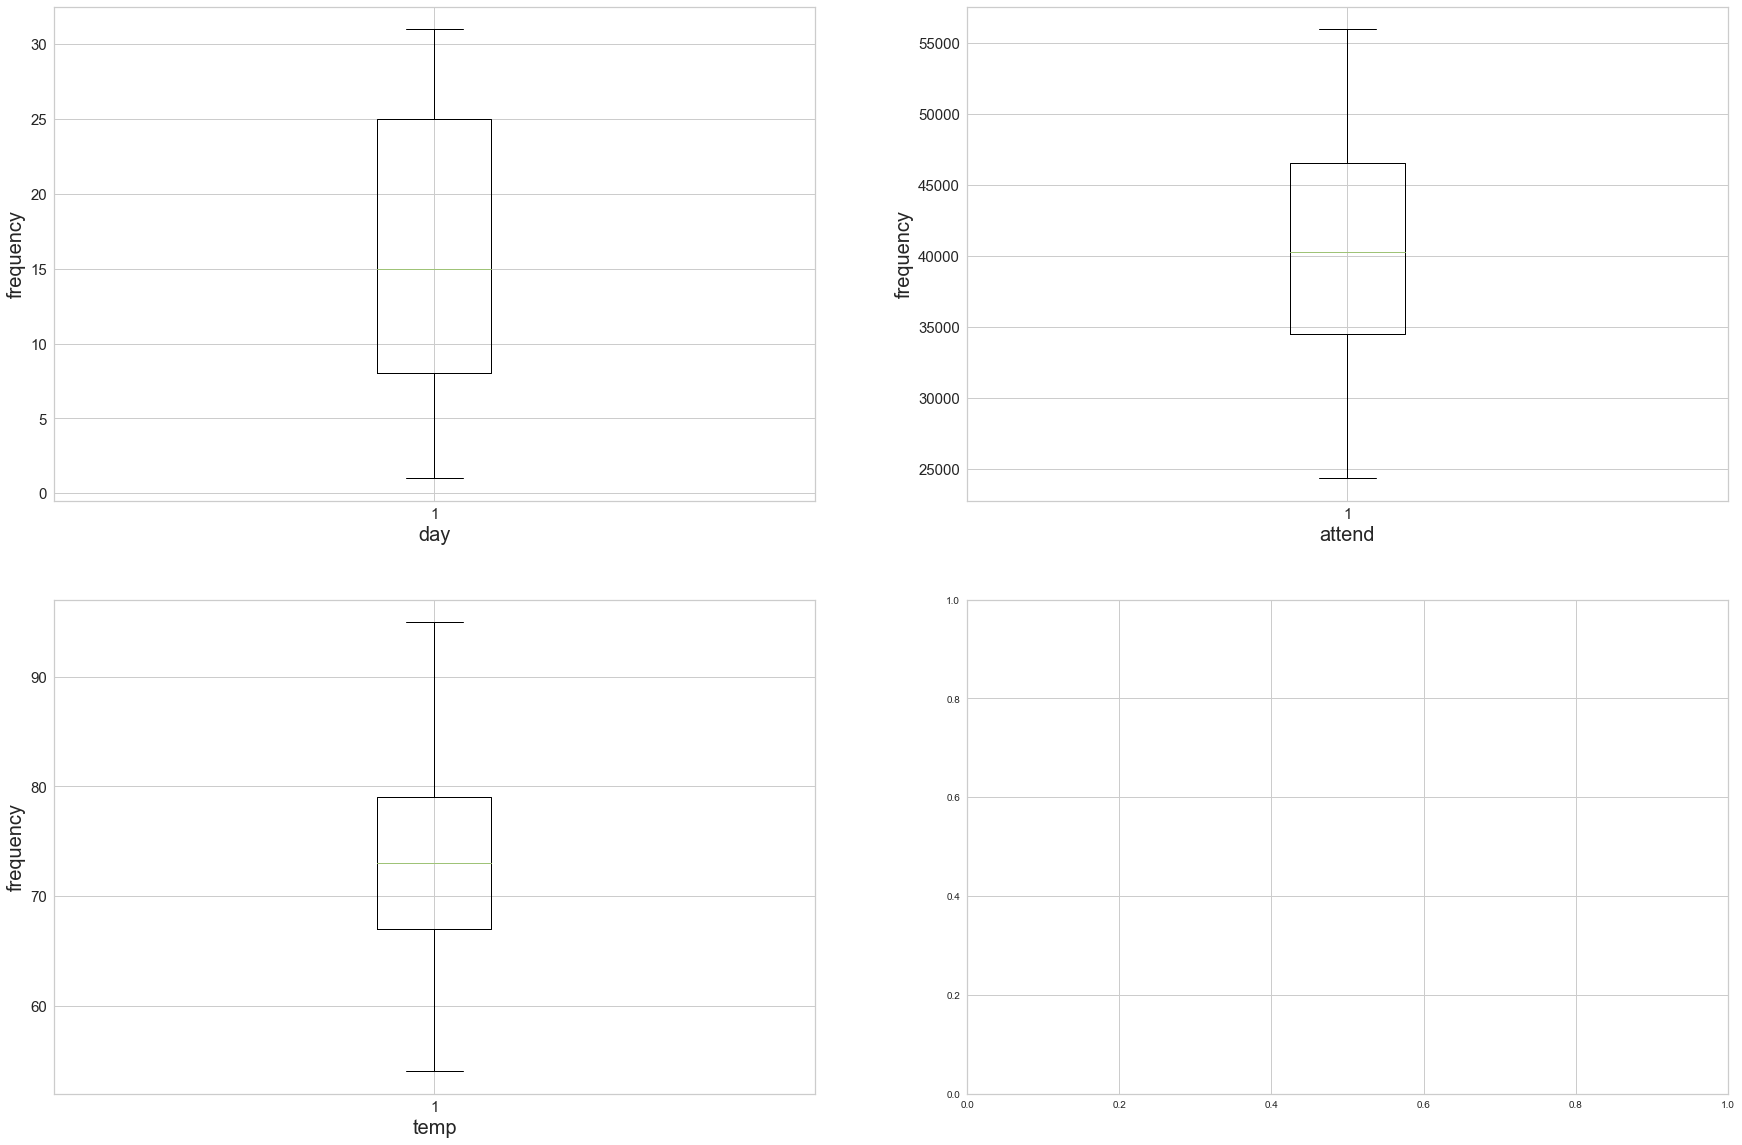

In [18]:
plt.rcParams['figure.figsize'] = (30, 20)
fig, axes = plt.subplots(nrows = 2, ncols = 2)


num_features = ['day', 'attend', 'temp']
xaxes = num_features
yaxes = ['frequency', 'frequency', 'frequency']


axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.boxplot(data[num_features[idx]])
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
    
    
plt.show()

In [23]:
import seaborn as sns

Text(0.5, 0.98, 'Box Plot Attendance by Month')

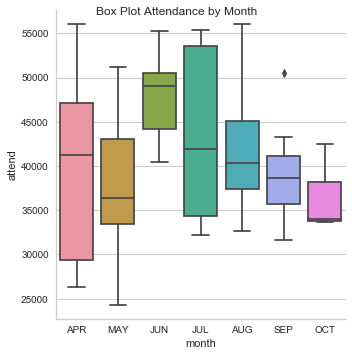

In [25]:

ax = sns.catplot(x='month', y='attend', kind = 'box', data = data)
ax.fig.suptitle('Box Plot Attendance by Month')


I found out this plot very interesting and easy to understand, we see months with a small range of attendance like september and october, but we can see that  Good game most happened in September that is the  month that we can see an "oulier" of more than 50k in attendance, I would need more information of the data set in order to determine is this is really an outlier or not

Text(0.5, 0.98, 'Box Plot Attendance by Month')

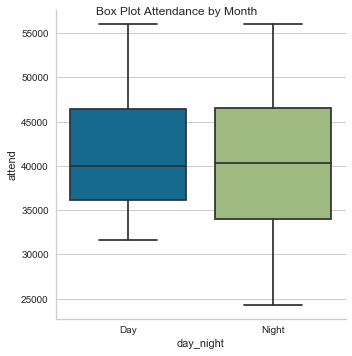

In [52]:

ax = sns.catplot(x='day_night', y='attend', kind = 'box', data = data)
ax.fig.suptitle('Box Plot Attendance by Month')

Text(0.5, 0.98, 'Box Plot Attendance by Cap give away')

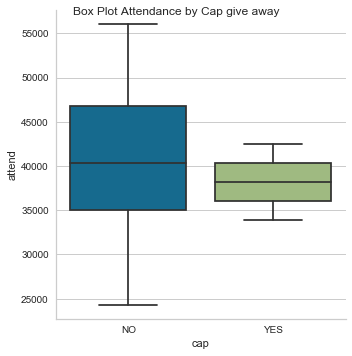

In [26]:
ax = sns.catplot(x='cap', y='attend', kind = 'box', data = data)
ax.fig.suptitle('Box Plot Attendance by Cap give away')

The Cap give away does not show any evident difference in number of attendance

Text(0.5, 0.98, 'Box Plot Attendance by Shirt give away')

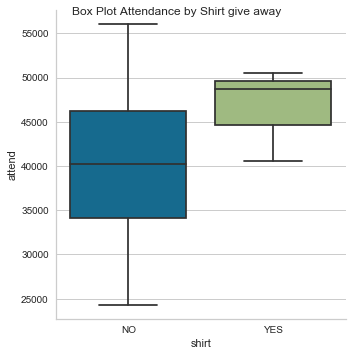

In [27]:
ax = sns.catplot(x='shirt', y='attend', kind = 'box', data = data)
ax.fig.suptitle('Box Plot Attendance by Shirt give away')

This boxplot is interesting, the shirt give away game, have more attendance than the games with not shirt give away

Text(0.5, 0.98, 'Box Plot Attendance by Fireworks Show')

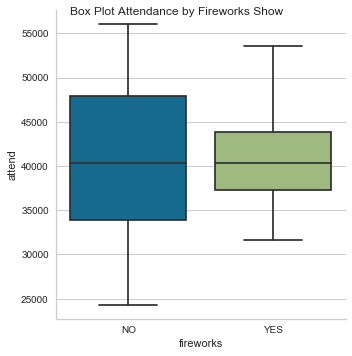

In [28]:
ax = sns.catplot(x='fireworks', y='attend', kind = 'box', data = data)
ax.fig.suptitle('Box Plot Attendance by Fireworks Show')

Fireworks does not make seems affect the attendance of the game, let's see more detail using scatterplots 

## Scatterplots

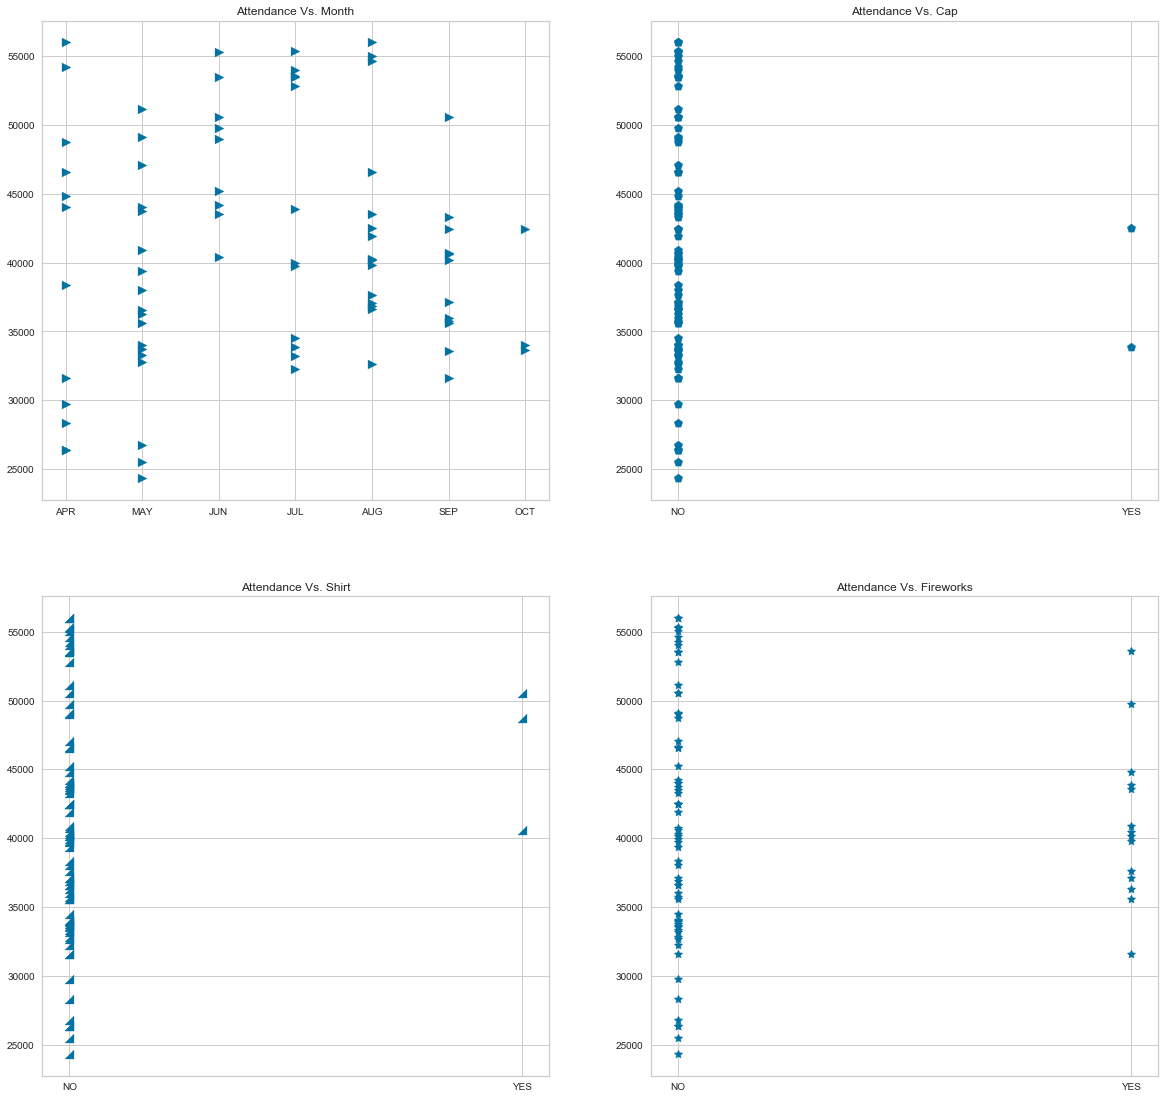

In [31]:
plt.figure(figsize=(20,30))
plt.subplot(321)
plt.title('Attendance Vs. Month')
plt.scatter(data.month, data.attend , s=80, marker=">")

plt.subplot(322)
plt.title('Attendance Vs. Cap')
plt.scatter(data.cap, data.attend, s=80, marker=(5, 0))

verts = np.array([[-1, -1], [1, -1], [1, 1], [-1, -1]])
plt.subplot(323)
plt.title('Attendance Vs. Shirt')
plt.scatter(data.shirt, data.attend, s=80, marker=verts)

plt.subplot(324)
plt.title('Attendance Vs. Fireworks')
plt.scatter(data.fireworks, data.attend, s=80, marker=(5, 1))


plt.show()

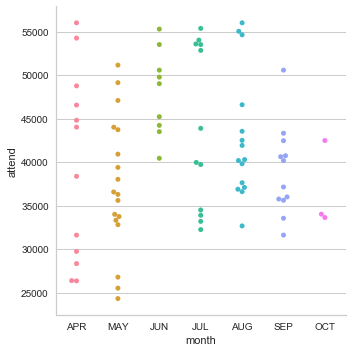

In [32]:
sns.catplot(x="month", y="attend", kind="swarm", data=data)

Text(0.5, 0.98, 'Scartter Plot Attendance Vs. Bobble Head and Time of the day')

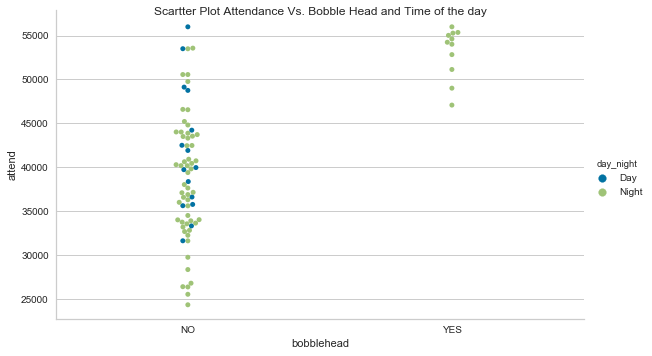

In [54]:
ax = sns.catplot(x="bobblehead", y="attend", kind="swarm", hue='day_night', data=data, aspect=20/12)
ax.fig.suptitle("Scartter Plot Attendance Vs. Bobble Head and Time of the day")

This plot shows how the nights with Bobble Head Prop were the most attended games >56K. If we we want to take a quick decision of how to improbe attendance just looking at this plot I would say that the nights of 

## Correlation

Using Correlation to based my feature selection on the variables with higher correlation with the attendance number:

In [44]:
data.corr(method='pearson', min_periods=1)

,day,attend,temp
day,1.000000,0.027093,-0.127612
attend,0.027093,1.000000,0.098951
temp,-0.127612,0.098951,1.000000


In [66]:
cat_features = ['month', 'shirt', 'bobblehead', 'day_night']
data_cat = data[cat_features]
# One Hot Encoding 
data_cat_dummies = pd.get_dummies(data_cat)
# check the data
print(data_cat_dummies.head(8))

   month_APR  month_AUG  month_JUL  month_JUN  month_MAY  month_OCT  \
0          1          0          0          0          0          0   
1          1          0          0          0          0          0   
2          1          0          0          0          0          0   
3          1          0          0          0          0          0   
4          1          0          0          0          0          0   
5          1          0          0          0          0          0   
6          1          0          0          0          0          0   
7          1          0          0          0          0          0   

   month_SEP  shirt_NO  shirt_YES  bobblehead_NO  bobblehead_YES  \
0          0         1          0              1               0   
1          0         1          0              1               0   
2          0         1          0              1               0   
3          0         1          0              1               0   
4          0        

In [67]:
features_model = ['attend']
data_model_X = pd.concat([data[features_model], data_cat_dummies], axis=1)

In [68]:
corr=data_model_X.corr()

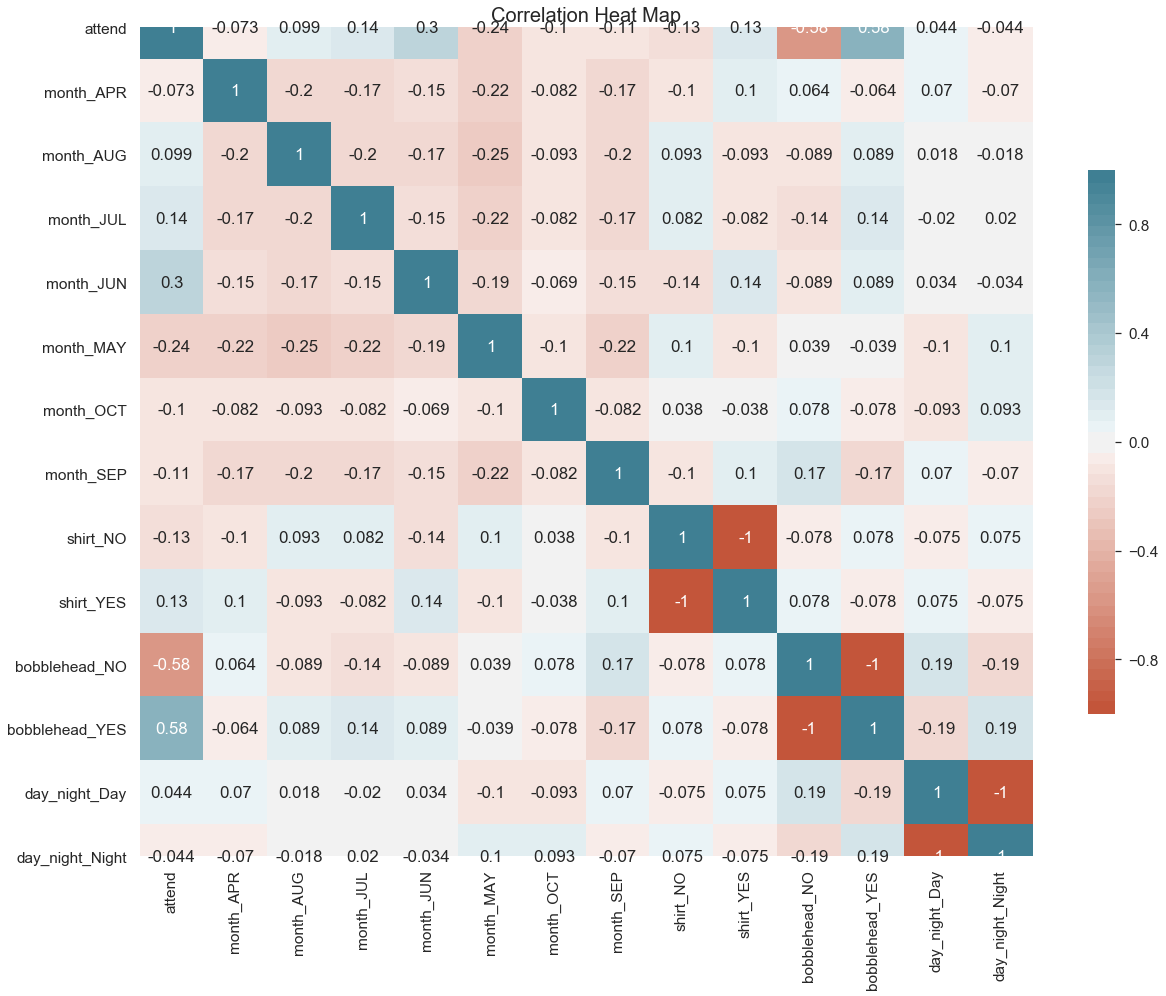

In [69]:
fig, ax = plt.subplots(figsize=(20,20))
sns.set(font_scale= 1.4)
sns.heatmap(corr, annot=True, vmin = -1, vmax = 1, center = 0, cmap=sns.diverging_palette(20, 220, n=50), square=True, cbar_kws={"shrink": 0.5})
plt.title('Correlation Heat Map', fontsize = 20)
plt.show()

Correlation Heat map is related with the graph analyisis, The marketing strategy with highr positive correlation would be the Boblle Head

## Regression

In [70]:
from sklearn import linear_model

In [78]:
X = data_model_X[['month_APR', 'month_AUG', 'month_JUL', 'month_JUN', 'month_MAY', 'month_OCT', 'month_SEP']]
y = data_model_X['attend']

regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [75]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 5.947981196867847e+18
Coefficients: 
 [ 5.65169534e+15  5.65169534e+15  5.65169534e+15  5.65169534e+15
  5.65169534e+15  5.65169534e+15  5.65169534e+15 -6.15928041e+17
 -6.15928041e+17 -4.90399334e+18 -4.90399334e+18 -4.33711514e+17
 -4.33711514e+17]


In [80]:
regr

AttributeError: 'LinearRegression' object has no attribute 'summary'